In [4]:
!pip3 install yfinance

  Using cached https://files.pythonhosted.org/packages/c2/31/8b374a12b90def92a4e27d0fc595fc43635f395984e36a075244d98bd265/yfinance-0.1.54.tar.gz
  Using cached https://files.pythonhosted.org/packages/69/e7/e9f1661c28f7b87abfa08cb0e8f51dad2240a9f4f741f02ea839835e6d18/multitasking-0.0.9.tar.gz
  Stored in directory: /Users/LMN/Library/Caches/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
  Stored in directory: /Users/LMN/Library/Caches/pip/wheels/37/fa/73/d492849e319038eb4d986f5152e4b19ffb1bc0639da84d2677
Successfully built yfinance multitasking


In [5]:
import yfinance
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [9]:
portfolio_composition = [('MSFT',0.5),('AAPL',0.2),('GOOG',0.3)]
returns = pd.DataFrame({})

In [10]:
for t in portfolio_composition:
  name = t[0]
  ticker = yfinance.Ticker(name)
  data = ticker.history(interval="1d",start="2010-01-01",end="2019-12-31")
  data['return_%s' % (name)] = data['Close'].pct_change(1)

  returns = returns.join(data[['return_%s' % (name)]],how="outer").dropna()

In [12]:

def simulate_returns(historical_returns,forecast_days):
  return historical_returns.sample(n = forecast_days, 
                                   replace = True).reset_index(drop = True)

In [13]:

simulate_returns(returns['return_AAPL'],1000)

0     -0.003064
1     -0.000381
2      0.004133
3     -0.015436
4      0.009123
5      0.003347
6     -0.002746
7      0.006188
8     -0.006881
9     -0.009982
10    -0.004195
11     0.020405
12    -0.008316
13    -0.005871
14     0.024374
15     0.010111
16     0.011346
17    -0.008175
18    -0.005641
19     0.011906
20    -0.002488
21     0.009808
22     0.017432
23     0.002989
24    -0.005328
25     0.021335
26     0.005774
27     0.029412
28    -0.007162
29    -0.019699
         ...   
970    0.009098
971    0.006217
972   -0.011603
973   -0.010316
974    0.001722
975    0.015276
976    0.002001
977    0.029920
978    0.002816
979   -0.033068
980   -0.013679
981    0.011211
982    0.001859
983    0.014399
984    0.014138
985    0.003647
986   -0.032155
987   -0.007764
988    0.000317
989    0.009808
990   -0.001160
991    0.004690
992   -0.007718
993   -0.020761
994   -0.012070
995    0.000000
996   -0.000146
997    0.000956
998   -0.007559
999   -0.003972
Name: return_AAPL, Lengt

In [14]:
def simulate_portfolio(historical_returns,composition,forecast_days):
  result = 0
  for t in composition:
    name,weight = t[0],t[1]
    s = simulate_returns(historical_returns['return_%s' % (name)], forecast_days)
    result = result + s * weight
  
  return(result)

In [15]:
simulate_portfolio(returns,portfolio_composition,10)

0   -0.004642
1    0.000305
2    0.002757
3    0.002859
4    0.017170
5    0.006735
6    0.010303
7    0.002298
8    0.002749
9    0.008662
dtype: float64

In [16]:
def simulate_portfolio(historical_returns,composition,forecast_days):
  result = 0
  for t in composition:
    name,weight = t[0],t[1]
    s = simulate_returns(historical_returns['return_%s' % (name)], forecast_days)
    result = result + s * weight
  
  return(result)

In [18]:
simulate_portfolio(returns,portfolio_composition,10)

0    0.009495
1   -0.002269
2   -0.005619
3    0.005034
4   -0.001814
5    0.006613
6   -0.006327
7    0.000529
8    0.004477
9   -0.000421
dtype: float64

In [19]:
def simulate_modified_returns(historical_returns,forecast_days,correct_mean_by):
  h = historical_returns.copy()

  new_series = h + correct_mean_by

  return new_series.sample(n=forecast_days,replace=True).reset_index(drop=True)

In [20]:
def simulate_modified_portfolio(historical_returns,composition,forecast_days):
  result = 0
  for t in composition:
    name,weight,correction = t[0],t[1],t[2]
    s = simulate_modified_returns(historical_returns['return_%s' % (name)], forecast_days,correction)
    result = result + s * weight
  
  return(result)

In [21]:
def simulation(historical_returns,composition,forecast_days,n_iterations):
  simulated_portfolios = None

  for i in range(n_iterations):
    sim = simulate_modified_portfolio(historical_returns,composition,forecast_days)

    sim_port = pd.DataFrame({'returns_%d' % (i) : sim})

    if simulated_portfolios is None:
      simulated_portfolios = sim_port
    else:
      simulated_portfolios = simulated_portfolios.join(sim_port)
    
  return simulated_portfolios

In [22]:
returns.mean(axis=0)

return_MSFT    0.000851
return_AAPL    0.001090
return_GOOG    0.000700
dtype: float64

In [23]:
portfolio_composition = [('MSFT', 0.5,-0.0001), ('AAPL', 0.2,-0.001), ('GOOG', 0.3,-0.0005)]

In [24]:

forecast_days = 20
n_iterations = 200

In [25]:
simulated_portfolios = simulation(returns,portfolio_composition,forecast_days,n_iterations)

In [26]:
simulated_portfolios.head()

,returns_0,returns_1,returns_2,returns_3,returns_4,returns_5,returns_6,returns_7,returns_8,returns_9,...,returns_190,returns_191,returns_192,returns_193,returns_194,returns_195,returns_196,returns_197,returns_198,returns_199
0,0.002682,-0.007465,0.005987,-0.005620,0.002049,-0.010955,0.001253,-0.005633,0.009124,-0.001602,...,-0.004929,-0.001724,0.010461,0.008261,0.000879,0.004388,0.009708,0.005418,0.008088,0.000194
1,0.005706,0.008084,0.006165,0.014755,-0.001904,0.006487,-0.029053,-0.004354,-0.011453,-0.005932,...,0.005039,0.000574,-0.022648,0.004371,-0.018504,0.000556,0.008134,-0.004241,0.007680,0.000135
2,0.001857,0.005279,0.025864,-0.001798,0.014983,-0.001289,0.000705,-0.000230,-0.002716,0.001714,...,-0.002568,-0.000926,-0.004395,0.004887,0.011789,-0.001754,-0.013909,-0.004703,-0.015310,-0.011376
3,-0.012406,0.004375,-0.004637,0.000759,-0.011705,0.002819,-0.004440,0.011424,-0.036393,-0.000749,...,-0.003474,-0.003124,-0.003786,0.000663,-0.009390,0.002163,0.008308,0.016636,-0.004272,0.002400
4,-0.017223,-0.000135,0.011837,0.004018,-0.004206,0.004822,-0.002636,0.007401,0.005649,0.001557,...,0.001730,-0.004367,0.004694,0.005144,0.009574,-0.001019,-0.014781,-0.006905,0.018890,-0.005947


In [27]:
percentile_5th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,5),axis=1)
percentile_95th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,95),axis=1)
average_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x),axis=1)

In [28]:
print(percentile_5th.tail(1))
print(percentile_95th.tail(1))
print(average_port.tail(1))

19   -0.049674
dtype: float64
19    0.077564
dtype: float64
19    0.012598
dtype: float64


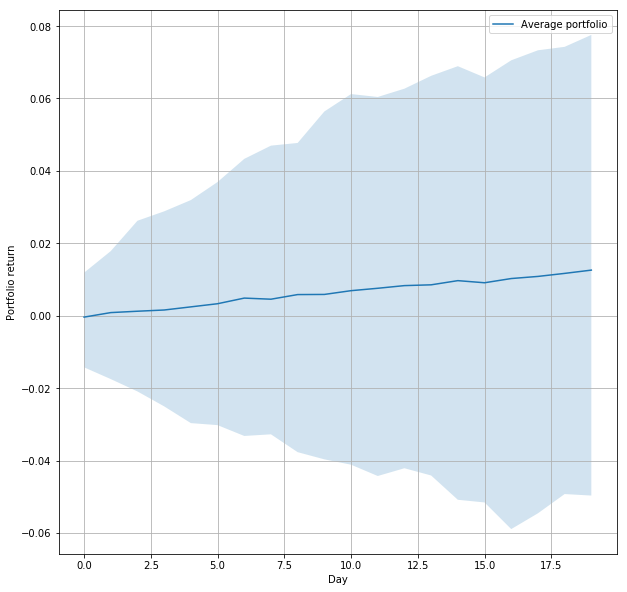

In [33]:
#Confidence interval for future portfolios¶
x = range(forecast_days)

plt.rcParams['figure.figsize'] = [10, 10]

plt.plot(x,average_port,label="Average portfolio")
plt.xlabel("Day")
plt.ylabel("Portfolio return")


plt.fill_between(x, percentile_5th, percentile_95th,alpha=0.2)
plt.grid()
plt.legend()

plt.show()

In [35]:
#Probability of beating the portfolio target

In [36]:
target_return = 0.02

target_prob_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x > target_return),axis=1)

In [37]:
target_prob_port.tail(1)

19    0.435
dtype: float64

In [38]:
err_bars = np.sqrt(target_prob_port*(1-target_prob_port)/n_iterations)

In [40]:
err_bars.tail(1)

19    0.035055
dtype: float64

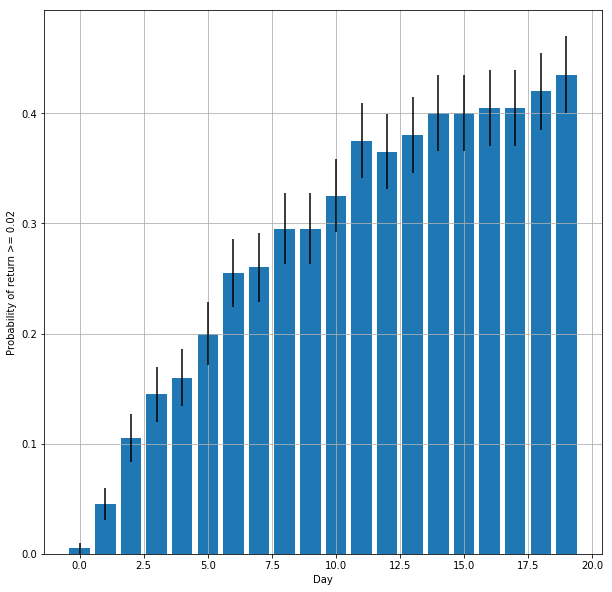

In [41]:
x = range(forecast_days)

plt.rcParams['figure.figsize'] = [10, 10]

plt.bar(x,target_prob_port,yerr = err_bars)

plt.xlabel("Day")
plt.ylabel("Probability of return >= %.2f" % (target_return))

plt.grid()

plt.show()

In [43]:
#Sharpe ratio histogram

In [44]:
sharpe_indices = simulated_portfolios.apply(lambda x : np.mean(x)/np.std(x))

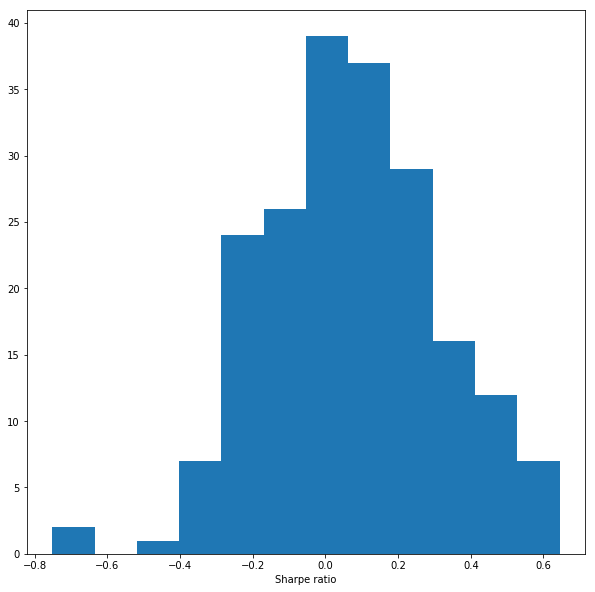

In [45]:
plt.hist(sharpe_indices,bins="rice")
plt.xlabel("Sharpe ratio")

plt.show()

In [46]:
np.mean(sharpe_indices)

0.06958054951875808